In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn 
from sklearn.datasets import load_boston

In [96]:
data = load_boston()

c:\Users\adamw\OneDrive\桌面\VirtualEnv\v01\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

- CRIM 住房所在城鎮的人均犯罪率
- ZN 住房用地超過 25,000 平方尺的比例
- INDUS 住房所在城鎮非零售商用土地的比例
- CHAS 有關查理斯河的虛擬變數(如果住房位於河邊則為 1，否則為 0)
- NOX 一氧化氮濃度
- RM 每處住房的平均房間數
- AGE 建於 1940 年之前的業主自住房比例
- DIS 住房距離波士頓五大中心區域的加權距離
- RAD 距離住房最近的公路入口編號
- TAX 每 10,000 美元的全額財產稅金額
- PTRATIO 住房所在城鎮的師生比例
- B 1000(Bk-0.63)^2，其中 Bk 指代城鎮中黑人的比例
- LSTAT 弱勢群體人口所占比例
- MEDV 業主自住房的中位數房價(以千美元計)

In [97]:
data_df = pd.DataFrame(data=data.data,columns=data.feature_names)
data_df["MEDV"] = data.target
data_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [98]:
data_df.describe()
# 可以稍微檢查一下 類別型有沒有異常
# 百分比率 有沒有不合理
# 資料筆數是否相同

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### 檢查有無缺失值

In [99]:
data_df.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [100]:
# to_numeric 將一列或多列轉為數值最佳方法，會嘗試將字串改為整數浮點，若不能轉換則為NAN
# astype 強行轉換
# infer_objects 推論轉換
data_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

C:\Users\adamw\AppData\Local\Temp\ipykernel_7108\3092774050.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.target)


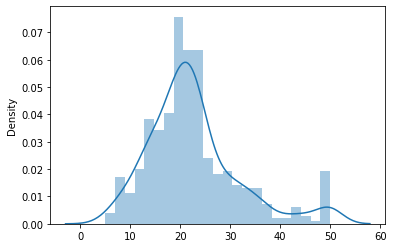

In [101]:
sns.distplot(data.target)
plt.show()

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

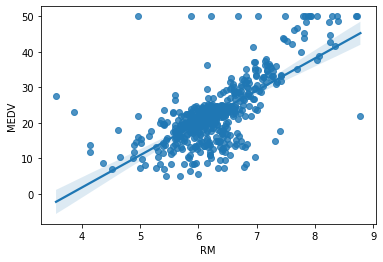

In [102]:
# regplot()：根據資料繪製線性迴歸(Linear Regression)模型圖
# 透過簡單線性回歸可看出 平數 與 房價 呈現正相關
sns.regplot(x=data_df["RM"], y=data_df["MEDV"])


<AxesSubplot:>

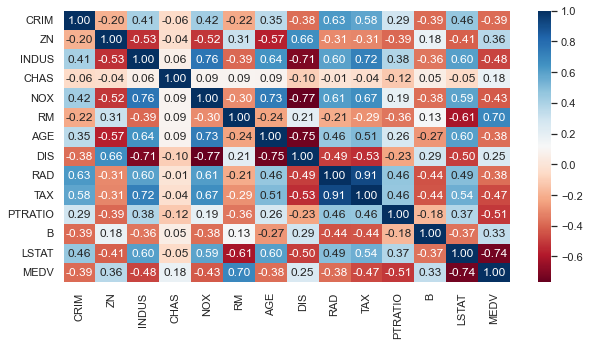

In [103]:
#透過皮爾森映射熱力圖看出哪些特徵與目標變數有較高的相關性。

sns.set(rc={"figure.figsize":(10,5)})
sns.heatmap(data=data_df.corr(),cmap="RdBu", #cmap="Greens"
 annot_kws={"size":12},
 annot=True,
 fmt=".2f")


元迴歸分析造成下列的不良影響：
1. 膨脹最小平方法（least squares）估計參數值的變異數和共變數，使得迴歸係數的
估計值變得很不精確。
2. 膨脹迴歸係數估計值的相關係數。
3. 膨脹預測值的變異數，但對預測能力不影響。
4. 造成解釋迴歸係數及其信賴區間估計之困難。
5. 造成整體模式的考驗達顯著，但各別迴歸係數之考驗不顯著的矛盾現象和解釋上
之困擾。
6. 造成迴歸係數的正負號與所期望者相反的衝突現象，這是由於自變項間之壓抑效
果（suppress effect）造成的。
一個比較簡單的診斷方法是察看自變項間的相關係數矩陣，看看該矩陣中是否
有元素值（即自變項兩兩之間的相關係數值）是大於.90 以上者，若有，即表示該二
變項互為「多元共線性變項」，並認為該迴歸分析中有嚴重的多元共線性問題存在。
另一個比較正式、客觀的診斷法，則為使用第 j 個自變項的「變異數膨脹因數」
（variance inflation factor）作為判斷的指標，凡變異數膨脹因數指標值大於 10 者，
即表示第 j 個自變項是一個多元共線性變項。
在一般的迴歸分析中，針對這種多元共線性問題，有些統計學家會建議將多元
共線性變項予以刪除，不納入迴歸方程式中。但避免多元共線性問題所造成困擾的
最佳解決方法，不是刪除該具有多元共線性變項，而是使用所謂的「偏差迴歸分析」
（biased regression analysis, BRA）。其中以「山脊型迴歸」（ridge regression）最受到
學者們的重視和使用；除此之外，尚有「主成分迴歸」（principal component
regression）、「潛在根迴歸」（latent root regression）、「貝氏法迴歸」（Baysean
regression）、「遞縮式迴歸」（shrinkage regression）等，不過這些偏差迴歸分析法所獲
得的迴歸係數值都是「有偏差的」（biased），亦即這些迴歸係數的期望值不等於母群
體的迴歸係數值，所以稱作偏差迴歸係數估計值，而本補救多元共線性問題的方法
即稱作偏差迴歸分析法。


In [104]:
x = data_df.drop("MEDV",axis=1)
y = data_df["MEDV"]

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)


In [106]:
np.set_printoptions(precision=3, suppress=True)
reg = LinearRegression()
reg.fit(x_train,y_train)
coef_df = pd.DataFrame(columns=x_train.columns,data=reg.coef_.reshape(1,13))
predict = pd.DataFrame(reg.predict(x_test))
print("訓練集score",reg.score(x_train,y_train))
print("測試集score",reg.score(x_test,y_test)) 
# score 會把x_test拿去predict，之後再與y_test進行r2計算，與統計模型的r2_score一樣
# 只是r2_score需要傳入predict的結果
print("w權重",reg.coef_)
coef_df

# 可以看出RM對於房價的影響是比較高的
# 負相關的部分可以思考一下為什麼，例如NOX(一氧化碳農度)可以看出對於房價是負影響，可能工業區或嚴重汙染地區

訓練集score 0.7645451026942549
測試集score 0.6733825506400171
w權重 [ -0.121   0.044   0.011   2.511 -16.231   3.859  -0.01   -1.5     0.242
  -0.011  -1.018   0.007  -0.487]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.12131,0.044466,0.011342,2.511246,-16.231253,3.859068,-0.009985,-1.50027,0.242143,-0.011072,-1.017753,0.006814,-0.486738



如果預測房價和實際房價一致的話，那麼所有的資料點都應該彙
集在 y = x 這條線上，但這並不是現實，於是可以看到，除了少數點，大部分點散落在 y = x
附近，大趨勢說明預測的結果還不錯。


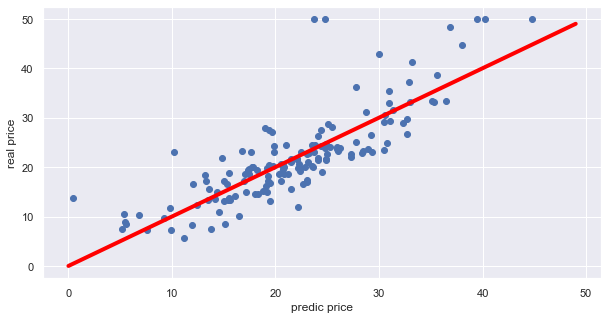

In [111]:
plt.scatter(predict,y_test)
plt.xlabel("predic price")
plt.ylabel("real price")

x = np.arange(0, 50)
y = x
plt.plot(x, y, color="red", lw=4)

In [108]:
predict = pd.Series(predict)
#重新設定 index
y_test.reset_index(inplace=True, drop=True)
predict.reset_index(inplace=True, drop=True)
draw_data = pd.concat([y_test,predict],axis=1)
draw_data.columns = ["實際房價","預測房價"]
#用於正常顯示中文，Apple Mac 可選用 Arial
plt.rcParams["font.sans-serif"] = "Microsoft JhengHei"
#用於正常顯示符號
plt.rcParams["axes.unicode_minus"] = False
sns.lmplot(x="實際房價", y="預測房價",
 data=draw_data,
 height=6,
 aspect=1.2,
 ci=95)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

量化評估指標
###
但依經驗歸納如下：R2的
值大於 0.75，表示迴歸模型擬合度很好，迴歸方程的可解釋程度較高，即迴歸方程的精度較
高。R2 的值在 0.5 和 0.75 之間，表示迴歸模型的擬合可以接受，但需要進一步修正迴歸模型。
R2 的值小於 0.5，表示迴歸模型擬合有問題，

In [110]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test,predict)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predict))
r2 = metrics.r2_score(y_test, predict)
print(mse)
print(rmse)
print(r2)


27.195965766883408
5.214975145375423
0.6733825506400171


=====================================================================================================================================

### 訓練完準確度不高怎麼辦

為甚麼「訓練模型的正確率」這麼低呢（正確率：0.7645451026942549）？
因為線性迴歸的的方程式為一條直線，當特徵與房價不成線性關係的話，那麼再怎麼分析，正確率都不會高。
解決的方法有：(1).只討論呈線性關係的特徵、(2).使用多項式迴歸、(3).降維。


### (一) 以特徵重要性訓練模型

In [ ]:

boston_house = load_boston()
boston_house_df = pd.DataFrame(data=boston_house.data,columns=boston_house.feature_names)
boston_house_price = boston_house.target


前述分析是直接使用所有的 13 個特徵，如果可以只選取比較重要的特徵出來分析？特別注意到如果要找尋重要性的話，一定要先做標準化，不然數據
跑出來的結果會整個失真。

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler() # Z-scaler 物件
X_scaled = scale.fit_transform(boston_house_df)
X_scaled_df = pd.DataFrame(X_scaled,columns=boston_house_df.keys())
X_scaled_df

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
LR_model = LinearRegression()
LR_model.fit(X_scaled, boston_house_price)
feature_importance = LR_model.coef_ #重要性
plt.figure(figsize=(8,6)) #圖形大小
plt.bar(X_scaled_df.columns, feature_importance) #繪製成直方圖
plt.show() 

基本上數值（取絕對值後）越大代表越重要。因此嘗試將 CRIM、INDUS、CHAS、AGE、
B 刪除，只使用 ZN、NOX、RM、DIS、RAD、TAX、PTRATIO、LSTAT 再做一次線性迴歸，
來預測房價。

In [ ]:
x = boston_house_df.drop(["CRIM","INDUS","CHAS","AGE","B"],axis=1)
y = boston_house_price
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
train_score = model.score(x_train, y_train)
print(f"訓練模型的正確率：{train_score}")
print(f"測試模型的正確率：{model.score(x_test,y_test)}")
print("="*45)
# #評估模型
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)
print("1.均方誤差(MSE) =", mse)
print("2.均方根誤差(RMSE) =", rmse)
print("3.判定係數(R^2）=", r2)
# 以比較重要的特徵下去跑，在這樣的資料下 看起來並沒有比較高

### (二) PCA 降維

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
boston_house = load_boston()
x = pd.DataFrame(data=boston_house.data,columns=boston_house.feature_names)
y = boston_house.target


In [ ]:

x_train, x_test, y_train, y_test = \
 train_test_split(x, y,
 test_size=0.3,
 random_state=0) #4

In [ ]:

# Standarize our training data
std_tool = StandardScaler()
std_tool.fit(x_train)
x_train = std_tool.transform(x_train)
# PC 降維
pca = decomposition.PCA(n_components=0.95)
pca.fit(x_train)
x_train = pca.transform(x_train)


import matplotlib.pyplot as plt
%matplotlib inline
lr_model = LinearRegression()
lr_model.fit(x_train, y_train) #將資料拿去訓練
# Standarize x_test
x_test = std_tool.transform(x_test)
# Dimension reduction usng PCA
x_test = pca.transform(x_test)
#將 test 的資料用訓練出來的模型去預測
y_predict = lr_model.predict(x_test)
plt.figure(figsize=(8,6))
plt.xlabel("Actual price") #X 軸的標題
plt.ylabel("Predict pcice") #Y 軸的標題
plt.plot([0,50], [0,50]) #劃一條基準線
plt.scatter(y_test, y_predict) #比對預測跟實際的差
print("train",lr_model.score(x_train, y_train))
print("test",lr_model.score(x_test, y_test))

### (三) 多項式

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
boston_house = load_boston()
x = pd.DataFrame(data=boston_house.data,columns=boston_house.feature_names)
y = boston_house.target

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=0) 



In [ ]:
model=make_pipeline(PolynomialFeatures(2),LinearRegression())
model.fit(x_train,y_train)
print("train",model.score(x_train,y_train))
print("test",model.score(x_test,y_test))


SVM
#### 主要優點：
1. 解決高維特徵的分類問題和回歸問題很有效,在特徵維度大於樣本數時依然有很好的效
果。
2. 僅僅使用一部分支援向量來做超平面的決策，無需依賴全部資料。
3. 有大量的核函數可以使用，從而可以很靈活的來解決各種非線性的分類回歸問題。
4. 樣本量不是海量資料的時候，分類準確率高，泛化能力強。
#### 主要缺點：
1. 如果特徵維度遠遠大於樣本數，則 SVM 表現一般。
2. SVM 在樣本量非常大，核函數映射維度非常高時，計算量過大，不太適合使用。
3. 非線性問題的核函數的選

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

boston_house = load_boston()

In [ ]:
train_x, test_x, train_y, test_y = \
 train_test_split(boston_house.data, boston_house.target,
 test_size=0.30,
 random_state=0) 

In [ ]:
# 無標準化
boston_svr = SVR()
boston_svr.fit(train_x, train_y)
print("train",boston_svr.score(train_x,train_y))
print("test",boston_svr.score(test_x,test_y))

train 0.21624037461916024
test 0.1811277097860169


In [ ]:
# 有標準化
ss_x = StandardScaler()
train_x = ss_x.fit_transform(train_x)
test_x = ss_x.transform(test_x)
boston_svr = SVR()
boston_svr.fit(train_x, train_y)
print("train",boston_svr.score(train_x,train_y))
print("test",boston_svr.score(test_x,test_y))
boston_svr_test_y_predict = boston_svr.predict(test_x)
# len(boston_svr_test_y_predict)
# len(test_y)

train 0.6979834985580843
test 0.5543454037359111


In [ ]:

plt.figure(figsize=(8, 4), dpi=80)
plt.plot(range(len(test_y)),
 test_y,
 ls="-.",
 lw=2,
 c="r",
 label="真實值")
plt.plot(range(len(boston_svr.predict(test_x))),
 boston_svr.predict(test_x),
 ls="-",
 lw=2,
 c="b",
 label="預測值")
#繪製網格
plt.grid(alpha=0.4, linestyle=":")
plt.legend()
plt.xlabel("number") #設置 x 軸的標籤文本
plt.ylabel("房價") #設置 y 軸的標籤文本
plt.show() #顯示圖形
#透過圖形可以直觀的看出，預測值和真實值還是有很大差距的


#### MLP 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns # visualization
from sklearn import datasets
from sklearn.neural_network import MLPClassifier # neural network
from sklearn.neural_network import MLPRegressor # neural network
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_boston

In [ ]:
boston_house = load_boston()

In [ ]:
data_df = pd.DataFrame(boston_house.data,columns=boston_house.feature_names)
data_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
train_x, test_x, train_y, test_y= train_test_split(boston_house.data,boston_house.target,test_size=0.3,
random_state=10)


In [ ]:
mlp = MLPRegressor(max_iter=500)
mlp.fit(train_x,train_y)
print("train",mlp.score(train_x,train_y))
print("test",mlp.score(test_x,test_y))

train 0.7715181686187258
test 0.6783231888810168


c:\Users\adamw\OneDrive\桌面\VirtualEnv\v01\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_x)
train_x_scaler = scaler.transform(train_x)
test_x_scaler = scaler.transform(test_x)
mlp = MLPRegressor(max_iter=500)
mlp.fit(train_x_scaler,train_y)

print("train",mlp.score(train_x_scaler,train_y))
print("test",mlp.score(test_x_scaler,test_y))
print(test_y)
print(mlp.predict(test_x_scaler))

train 0.8542463888536667
test 0.8422415890219487
[28.4 31.1 23.5 26.6 19.6 14.3 50.  14.3 20.7 37.6 20.4 27.5 36.2 32.
 33.1 48.8 24.6 26.4 23.2 17.  41.3 14.9 18.5 25.  36.4 19.5 27.1 14.9
 46.  17.9 30.3 31.6 23.1 24.7 16.7 18.3  8.4 37.3 22.1 22.  46.7 30.1
 12.1 29.1 16.6 23.9 19.9 21.4 45.4 15.6 22.7 12.5 24.3 43.8 22.  33.8
 19.3 22.6 16.1 15.  19.6 21.2 50.  50.  29.4 17.8 22.8  8.8 32.5 42.8
 12.6 28.6 19.1 50.  27.5 23.7 50.   7.2 18.7 37.  22.9 22.9 17.1 22.
 23.6 23.9 27.1 29.  22.2  7.  20.7 18.5 21.6 23.  16.  15.  23.9 24.4
 22.6 19.8 22.2 18.6 19.7 23.1 13.5 21.2 23.1 13.6 22.8 18.2 13.1 23.2
 22.8 25.1 18.9 10.9 19.3 17.4 15.6 20.6 50.  32.7 21.8 13.4 16.6 23.6
 11.  23.8 23.1 33.2 28.2  8.5 32.4 29.6 17.1 24.2 26.4 33.2 10.5  8.8
 28.  10.5 15.4 15.3 10.4 15.7 43.1 24.7 21.  19.4 10.9 21.7]
[26.51423994 34.73694245 27.2553808  28.71282449 20.51993582 16.21068817
 40.6387828  15.22347026 21.52409125 42.06803502 20.40545307 28.07130162
 27.5340264  32.20814348 30.4714613

c:\Users\adamw\OneDrive\桌面\VirtualEnv\v01\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
